In [ ]:
from torchvision import models

In [ ]:
def is_model(s): return s[0].isupper()
[_ for _ in dir(models) if is_model(_)]

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG']

In [ ]:
alexnet = models.AlexNet()

In [ ]:
type(alexnet)

torchvision.models.alexnet.AlexNet

In [ ]:
resnet;

In [ ]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

In [ ]:
preprocess

Compose(
    Resize(size=256, interpolation=bilinear)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
import requests
from PIL import Image

In [ ]:
url="https://kc-media-cdn-live.azureedge.net/cache/d/c/f/e/a/6/dcfea63db5a25100264c5a17ce49aa5fe6056614.jpg"
response = requests.get(url, stream=True)
img = Image.open(response.raw)

In [ ]:
response.raw

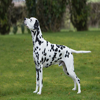

In [ ]:
img.resize((100, 100))

In [ ]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
img_t.shape

torch.Size([3, 224, 224])

In [ ]:
batch_t.shape

torch.Size([1, 3, 224, 224])

In [ ]:
resnet.eval();

In [ ]:
out = resnet(batch_t)

In [ ]:
out.shape

torch.Size([1, 1000])

In [ ]:
with open('../data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
_, index = torch.max(out, 1)

In [ ]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('dalmatian, coach dog, carriage dog', 99.80022430419922)

In [ ]:
out.ravel().sum()

tensor(0.0025, grad_fn=<SumBackward0>)

In [ ]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [ ]:
percentage.sum()

tensor(100.0000, grad_fn=<SumBackward0>)

In [ ]:
torch.nn.functional.softmax

<function torch.nn.functional.softmax(input: torch.Tensor, dim: Union[int, NoneType] = None, _stacklevel: int = 3, dtype: Union[int, NoneType] = None) -> torch.Tensor>